# <span style="color:Green"> **1. Prediction using Supervised Machine Learning**

### <span style="color:Green"> **By: [GINO FREUD D. HOBAYAN](https://gino-freud-hobayan.github.io/)**

<br>

### <span style="color:Green"> **Data science and Business Analytics Intern**
### <span style="color:Green"> **The Sparks Foundation**

<br>
<br>

## **Predictive Analytics: What will happen?**

### **Predict the percentage of a student based on the no. of study hours**

<br>


### 1. Descriptive Analytics
### 2. Diagnostic Analytics
### **<span style="color:Green">  3. Predictive Analytics**
### 4. Prescriptive Analytics


<br><br><br>
<br><br>

## <span style="color:Green"> **Problem Statement:**

### <span style="color:Green"> **What will be the predicted score if a student studies for 9.25hrs/day?**


<br>

<br>

## **Linear Regression with <span style="color:Green"> Python Scikit-Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. 

We will start with simple linear regression involving two variables.

<br>

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

**This is a simple linear regression task as it involves just two variables.**

<br>

## **Import Libraries and the CSV file:**

In [1]:
    # Libraries for Data Analysis and Data Manipulation
import numpy as np 
import pandas as pd


    # Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



    # Library to perform Statistical Analysis.
from scipy import stats



students_df = pd.read_csv("students_scores.csv")

In [2]:
students_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
students_df.info()            # This dataset has 25 rows and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
students_df.describe()         # Count, Mean, Standard deviation, and the Five-number summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Inspecting the Dataset:

### Pairplot to get a bird's eye view of the dataset

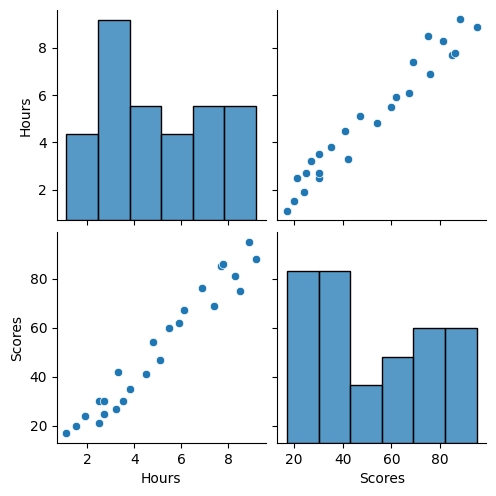

In [5]:
sns.pairplot(students_df)

<Axes: >

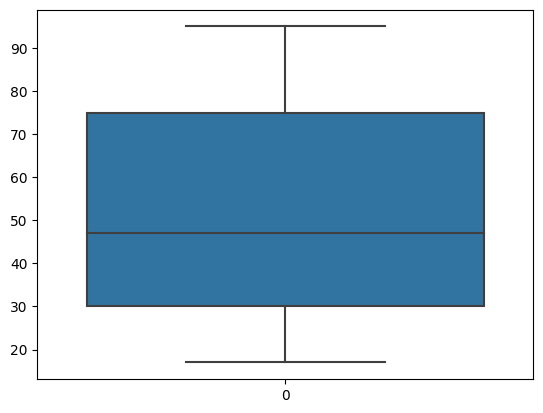

In [6]:
sns.boxplot(students_df["Scores"])

<Axes: >

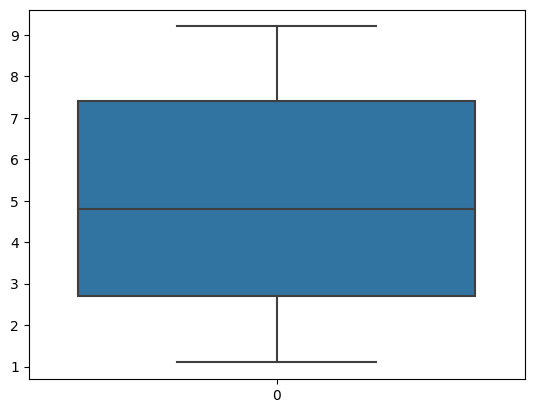

In [7]:
sns.boxplot(students_df["Hours"])

# **Correlation**

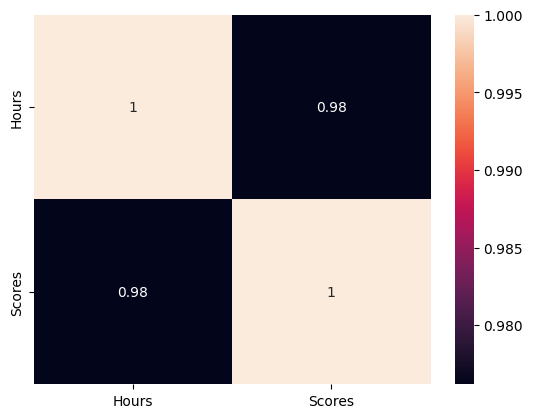

In [8]:
corr_matrix = students_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Inferences:

- Very high correlation of Scores and No. of Hours studied (0.98)

- <span style="color:Green"> However, correlation does not imply causation, so we cannot say that studying more hours causes higher scores

## Plotting the distribution of scores using a Scatter Plot

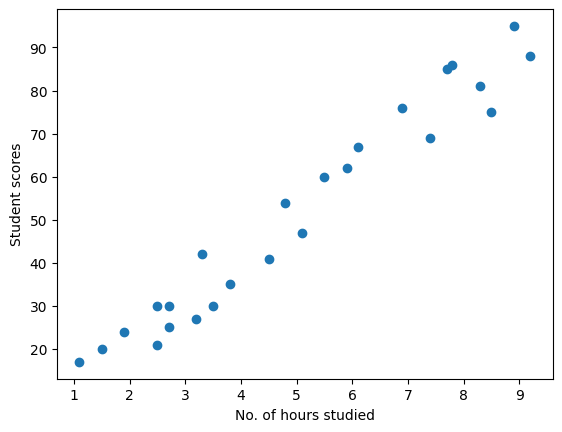

In [9]:
plt.scatter(students_df["Hours"], 
            students_df["Scores"])



plt.xlabel('No. of hours studied')  
plt.ylabel('Student scores')  


plt.show()

### Inference:

- There is a positive correlation between the student's scores and the no. of hours studied

- <span style="color:Green"> However, correlation does not imply causation, so we cannot say that studying more hours causes higher scores, or vice versa. 

    There might be other factors that affect both variables, such as motivation, intelligence, or quality of teaching.




![Machine_learning.png](https://www.mathworks.com/help/stats/machinelearning_supervisedunsupervised.png)


Source: https://www.mathworks.com/help/stats/machine-learning-in-matlab.html    

<br>

## **What is (supervised) machine learning?**

Machine Learning systems learn how to combine input to produce useful predictions on never-before-seen data.

Attributes and Labels are fundamental concepts in machine learning

<br>
<br>


### **1. Attributes/Features (x)**
A feature is an input variable—the x variable in simple linear regression. 

A simple machine learning project might use a single feature, while a more sophisticated machine learning project could use millions of features


<br>


### **2. Labels (y)**
A label is the thing we're predicting—the y variable in simple linear regression. 

The label could be the future price of wheat, the kind of animal shown in a picture, the meaning of an audio clip, or just about anything.


<br>

Source: https://developers.google.com/machine-learning/crash-course/framing/ml-terminology  

# <span style="color:Green"> **Prepare the data:**



### We're dividing the data into 

### <span style="color:Green"> **1.) Attributes (inputs) - No. of hours studied  (X)**

### <span style="color:Green"> **2.) Labels (outputs)    - Scores                (y)**


<br>

In [10]:
# attribute (input) - No. of hours studied

students_df.iloc[:, :-1].values         # Select all rows from the first column (Hours)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
# labels (output)   - Scores

students_df.iloc[:, 1].values          # Select all rows from the second column (Scores)

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

<br>
<br>
<br>


## Dividing the data:

In [12]:
X = students_df.iloc[:, :-1].values     # attribute (input) - No. of hours studied
y = students_df.iloc[:, 1].values       # labels (output)   - Scores


print("Successfully assigned our Attributes and Labels")

Successfully assigned our Attributes and Labels


### Now that we have our attributes and labels

### The next step is to split this data into training and test sets. 

<br>

### We'll do this by using:
### <span style="color:Green"> **Scikit-Learn's built-in train_test_split()** method:

In [13]:
from sklearn.model_selection import train_test_split  



X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0) 

This code is using the train_test_split() function from the sklearn library to split our dataset into two subsets: 

one for training and one for testing. 

<br>

### The function takes four arguments:

- <span style="color:Green"> **X**: This is the array of independent variables, or attributes/features, that we want to use to train and test our model. 

    In our case, this is the array of hours studied by the students.

<br>

- <span style="color:Green"> **y**: This is the array of dependent variables, or labels, that we want our model to predict. 

    In our case, this is the array of scores obtained by the students.

<br>

- <span style="color:Green"> **test_size**: This is the proportion of the dataset that we want to allocate to the test subset. 

    We can specify this as a float between 0 and 1, or as an integer representing the absolute number of samples. 

    In our case, we have set this to 0.2, which means that 20% of our data will be used for testing and 80% for training.


<br>

- <span style="color:Green"> **random_state**: This is an optional argument that we can use to control the randomness of the data shuffling before splitting. 

    If we set this to an integer, we can get reproducible results across multiple function calls. 

    In our case, we have set this to 0, which means that we will get the same split every time we run this code.


<br><br>


### <span style="color:Green"> **The function returns four arrays: X_train, X_test, y_train, and y_test.**

These are the subsets of our original data that we can use to train and test our model. 

<br>

For example: 

### <span style="color:Green"> **1.) Training = X_train and y_train are the arrays of features and labels for the training subset.**

### <span style="color:Green"> **2.) Testing = X_test and y_test are the arrays of features and labels for the testing subset.**

<br>

https://realpython.com/train-test-split-python-data/   

# <span style="color:Green"> **1.) Training Phase**

### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
# Importing the Linear model:

from sklearn.linear_model import LinearRegression  



regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

# <span style="color:Green"> **Slope and Intercept of the dataset**

### **Whats is Slope and Intercept?**

In [15]:
# Coefficient / Slope

regressor.coef_

array([9.91065648])

In [16]:
# Intercept

regressor.intercept_

2.0181600414346974

## Inference:

### <span style="color:Green"> **1. Coefficient (Slope): The coefficient (slope) is approximately 9.91**

This means that, on average, for each additional hour a student studies, their percentage is expected to increase by around 9.91 points.
 
**This is a positive relationship, indicating that more study hours generally lead to higher scores.**


<br><br>


### <span style="color:Green"> **2. Intercept: The intercept is approximately 2.02**

In the context of our model, this suggests that even if a student doesn't study at all (0 study hours), 

they would still have a predicted percentage of around 2.02. This represents the baseline performance without any studying.

# Plotting the regression line


<Axes: xlabel='Hours', ylabel='Scores'>

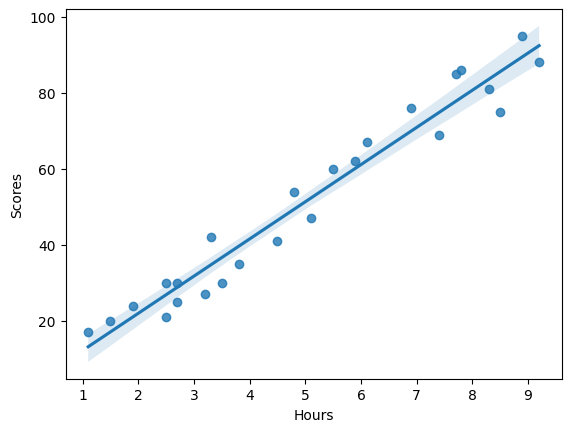

In [17]:
sns.regplot(x="Hours", 
            y="Scores", 
            data=students_df)


# <span style="color:Green"> **2.) Prediction Phase**

In [18]:
y_predict = regressor.predict(X_test)


y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Inferences:

- Each value in the y_predict array represents the predicted percentage for a student with a specific number of study hours. 

    For example, the first value (16.88) corresponds to the predicted percentage for the first student in your test dataset.


# <span style="color:Green"> **R Squared**


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. 

In other words, <span style="color:Green"> **r-squared shows how well the data fits the regression model (the goodness of fit).**

### **What is a good R-Squared?**

- it depends on the complexity of the topic

Example: Income




<br>
<br>

In [19]:
from sklearn.metrics import r2_score



r2_score(y_test, y_predict)               
# R2 = 0.9454



print(f"We have an R Squared of {r2_score(y_test, y_predict)}")

We have an R Squared of 0.9454906892105355


### Inference:

- Having an R-Squared of 0.94 means it is an incredibly good fit.

- <span style="color:Green"> **Our Regression model explains about 94.55% of the variation in the dependent variable.**

    This is a very high value, indicating that our model fits the data well.

<br>

<br>
<br>
<br>
<br>

### **Test: Predicing the score when the student studies of 7.5 hrs/day**

In [20]:
score0 = regressor.predict([[7.50]])



print(f"The score of a student when he/she studies for 7.5 hrs/day is {score0}")

The score of a student when he/she studies for 7.5 hrs/day is [76.34808365]


## <span style="color:Green"> **Predicting the score when the student studies for 9.25 hrs/day**

In [21]:
score = regressor.predict([[9.25]])



print(f"The score of a student when he/she studies for 9.25 hrs/day is {score}")

The score of a student when he/she studies for 9.25 hrs/day is [93.69173249]


## Explanation:

### **.predict()**

This code is using the predict() method of the regressor object to make a prediction on a new data point. 

The predict() method takes an array of features as input and returns an array of predicted labels as output. 

In this case, the feature is the number of hours studied by a student, and the label is the score obtained by the student.

<br>

The code is creating a 2D array with one element, which is 9.25, and passing it to the predict() method. 

<span style="color:Green"> **This means that the code is asking the regressor to predict the score of a student who studies for 9.25 hours per day.**

The predict() method returns an array with one element, which is the predicted score. 

The code assigns this array to a variable called score.

<br>

## Resources that helped me:

- How I use Machine Learning as a Data Analyst - Luke Barousse (https://www.youtube.com/watch?v=AopGnnPPczY)

- https://www.mathworks.com/help/stats/machine-learning-in-matlab.html  

- https://www.datacamp.com/blog/supervised-machine-learning

- Supervised Learning: Crash Course AI #2 (https://www.youtube.com/watch?v=4qVRBYAdLAo)

- https://www.stackvidhya.com/train-test-split-using-sklearn-in-python/

- https://realpython.com/train-test-split-python-data/ 

- https://developers.google.com/machine-learning/crash-course/framing/ml-terminology 

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html